<a href="https://colab.research.google.com/github/RasKrebs/aml_itu/blob/devs/notebooks/data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Setup`

In [80]:
import pandas as pd
import numpy as np
import os

try:
    # Mounting Colab Drive if possible
    from google.colab import drive
    drive.mount('/content/drive')

    # Cloning repo for colab
    try:
        %cd aml_itu/
        !git pull https://github.com/RasKrebs/aml_itu
    except:
        !git clone https://github.com/RasKrebs/aml_itu
        %cd aml_itu/
    os.environ["COLAB"] = "True"

except:
    # Changing directory into aml_itu
    if os.getcwd().split('/')[-1] != 'aml_itu': os.chdir(os.path.abspath('.').split('aml_itu/')[0]+'aml_itu')
    !git pull origin main --ff-only
    os.environ["COLAB"] = "False"

# Utils Import
from utils.helpers import *
from utils.StatefarmPytorchDataset import StateFarmDataset


# Torch
import torch
import torchvision
import torchvision.transforms as T
from torchvision.transforms import v2
import matplotlib.pyplot as plt

# Printing current working directory
print(os.getcwd())

From https://github.com/RasKrebs/aml_itu
 * branch            main       -> FETCH_HEAD
fatal: Not possible to fast-forward, aborting.
/Users/rasmuskrebs/Documents/School/semester_3/advanced_ml/aml_itu


### `Config`

In [81]:
# Loading the config file (if content is in workin directory must mean colab is being used)
config = load_config(eval(os.environ["COLAB"]))


# Training Images
train_img = config['dataset']['images']['train']

# Outputting config
config

{'dataset': {'name': 'state-farm-distracted-driver-detection',
  'colab_path': '/content/drive/MyDrive/aml-distracted-drivers-project',
  'data': '../state-farm-distracted-driver-detection/driver_imgs_list.csv',
  'images': {'train': '../state-farm-distracted-driver-detection/imgs/train',
   'test': '../state-farm-distracted-driver-detection/imgs/test'},
  'class_mapping': {'c0': 'safe driving',
   'c1': 'texting - right',
   'c2': 'talking on the phone - right',
   'c3': 'texting - left',
   'c4': 'talking on the phone - left',
   'c5': 'operating the radio',
   'c6': 'drinking',
   'c7': 'reaching behind',
   'c8': 'hair and makeup',
   'c9': 'talking to passenger'}},
 'outputs': {'path': './outputs'},
 'modeling_params': {'batch_size': 32, 'epochs': 100}}

## `Main`

In [82]:
# IMG Transformations
transforms = T.Compose([
    T.Resize((224)),
    T.RandomHorizontalFlip(p=0.5),
    v2.ToDtype(torch.float32, scale=True)
])

In [83]:
# Creating the dataset
train_data = StateFarmDataset(config, transform=transforms, split='train')
test_data = StateFarmDataset(config, split='test')

In [84]:
img, lab = train_data[28]

/Users/rasmuskrebs/.local/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [85]:
img.shape

torch.Size([3, 224, 298])

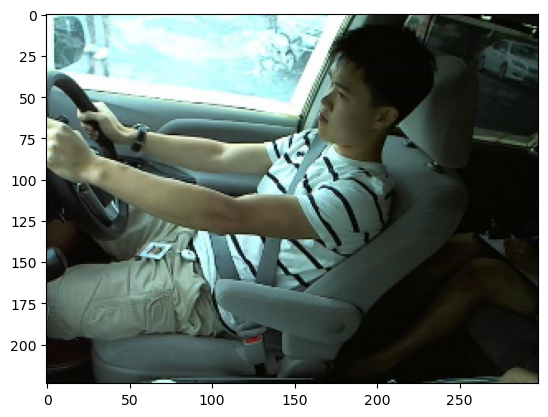

In [86]:
plt.imshow(img.permute(1, 2, 0))